### Importing Necessary Packages and Functions

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


### Reading Subtype Dataset

In [2]:
df_subtype = pd.read_csv("BRCA.547.PAM50.SigClust.Subtypes.txt", sep="\t")

In [3]:
df_subtype = df_subtype.set_index("Sample")
df_subtype.rename(columns = {'PAM50':'Subtype'}, inplace = True)

In [4]:
df_subtype.head()

,Type,Siglust,Subtype
Sample,,,
TCGA-AN-A0FL-01A-11R-A034-07,tumor,-13,Basal
TCGA-A1-A0SK-01A-12R-A084-07,tumor,-13,Basal
TCGA-BH-A0HL-01A-11R-A034-07,tumor,-13,Basal
TCGA-BH-A0HN-01A-11R-A084-07,tumor,-13,Basal
TCGA-BH-A0E0-01A-11R-A056-07,tumor,-13,Basal


### Reading Gene Expression Dataset

In [5]:
df_expression = pd.read_csv("BRCA.exp.547.med.txt", sep="\t").transpose()

In [6]:
genes = df_expression.loc["NAME"]
df_expression = df_expression.drop("NAME")
df_expression.columns = genes

In [7]:
df_expression.head()

NAME,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01A-11R-A115-07,0.220167,0.54375,0.354875,0.4335,1.065167,-0.11225,0.262333,-0.16625,0.322375,-0.496,...,0.308833,-0.00275,0.048,-0.2987,0.0625,-0.1575,0.1907,0.0472,-0.1925,-0.7193
TCGA-A1-A0SE-01A-11R-A084-07,-0.1055,0.0,0.305875,0.03925,0.517,1.31575,0.175333,-0.2975,0.067,0.0085,...,0.214333,0.05975,0.275167,0.2673,-0.0675,0.686,1.5998,-0.0969,-0.546,-0.8805
TCGA-A1-A0SH-01A-11R-A084-07,0.174583,1.3685,0.007,0.2325,1.844667,0.17925,0.6395,-0.05175,-0.47675,-0.138,...,0.027167,-0.02175,-0.2815,0.5805,0.278,0.24475,0.0275,-0.2257,-0.613,-0.491
TCGA-A1-A0SJ-01A-11R-A084-07,0.590083,-0.453,-0.295125,0.66525,-0.530167,0.12225,0.47,-0.02375,-0.421375,0.2545,...,0.483833,0.2475,0.615667,-0.0739,-0.448,0.7325,2.6229,0.3027,2.0545,-0.4711
TCGA-A1-A0SK-01A-12R-A084-07,1.125417,-1.528,0.08275,0.85075,-1.674,-0.849,-1.1125,0.732,0.23375,-0.494,...,-0.640833,0.13075,0.081,0.627,-0.239,-0.26475,-0.9026,-0.0246,-0.564,-0.359


### Merging into a Single Dataset

In [8]:
# dropping genes instead of individuals due to small sample size (dropping individuals almost cut sample in half)
df_combined = df_subtype.merge(df_expression, how="outer", left_index=True, right_index=True).dropna(axis=1)
df_combined.head()

,Type,Siglust,Subtype,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01A-11R-A115-07,tumor,-9,LumA,0.220167,0.54375,0.354875,0.4335,1.065167,-0.11225,0.262333,...,-0.43375,0.308833,-0.00275,0.048,-0.2987,-0.1575,0.1907,0.0472,-0.1925,-0.7193
TCGA-A1-A0SE-01A-11R-A084-07,tumor,-5,LumA,-0.1055,0.0,0.305875,0.03925,0.517,1.31575,0.175333,...,-0.1675,0.214333,0.05975,0.275167,0.2673,0.686,1.5998,-0.0969,-0.546,-0.8805
TCGA-A1-A0SH-01A-11R-A084-07,tumor,-5,LumA,0.174583,1.3685,0.007,0.2325,1.844667,0.17925,0.6395,...,-0.258,0.027167,-0.02175,-0.2815,0.5805,0.24475,0.0275,-0.2257,-0.613,-0.491
TCGA-A1-A0SJ-01A-11R-A084-07,tumor,-3,LumA,0.590083,-0.453,-0.295125,0.66525,-0.530167,0.12225,0.47,...,-0.415,0.483833,0.2475,0.615667,-0.0739,0.7325,2.6229,0.3027,2.0545,-0.4711
TCGA-A1-A0SK-01A-12R-A084-07,tumor,-13,Basal,1.125417,-1.528,0.08275,0.85075,-1.674,-0.849,-1.1125,...,-1.12875,-0.640833,0.13075,0.081,0.627,-0.26475,-0.9026,-0.0246,-0.564,-0.359


### Creating Random Forest Model

In [9]:
X = df_combined.drop(["Type", "Siglust", "Subtype"], axis=1) 
y = df_combined[["Subtype"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

### Evaluating Random Forest Model

In [12]:
y_pred = model.predict(X_test)

In [13]:
df_comparison = pd.DataFrame(zip(list(y_test['Subtype']), list(y_pred)), columns=['Actual','Predicted'])
df_comparison.head()

,Actual,Predicted
0,LumA,LumA
1,Basal,Basal
2,LumA,LumA
3,LumA,LumA
4,LumA,LumA


In [14]:
confusion_matrix = pd.crosstab(df_comparison['Actual'], df_comparison['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,Basal,Her2,LumA,LumB,Normal
Actual,,,,,
Basal,23,0,0,0,0
Her2,0,9,1,7,0
LumA,0,0,76,2,0
LumB,0,0,7,30,0
Normal,0,0,1,0,9


In [15]:
precision_scores = precision_score(list(y_test['Subtype']), list(y_pred), average=None)
precision_scores = [round(i, 2) for i in precision_scores]
recall_scores = recall_score(list(y_test['Subtype']), list(y_pred), average=None)
recall_scores = [round(i, 2) for i in recall_scores]

In [16]:
df_scores = pd.DataFrame(zip(precision_scores, recall_scores, confusion_matrix.columns), columns=['Precision','Recall', 'Class'])
df_scores = df_scores.set_index('Class')
df_scores

,Precision,Recall
Class,,
Basal,1.00,1.00
Her2,1.00,0.53
LumA,0.89,0.97
LumB,0.77,0.81
Normal,1.00,0.90


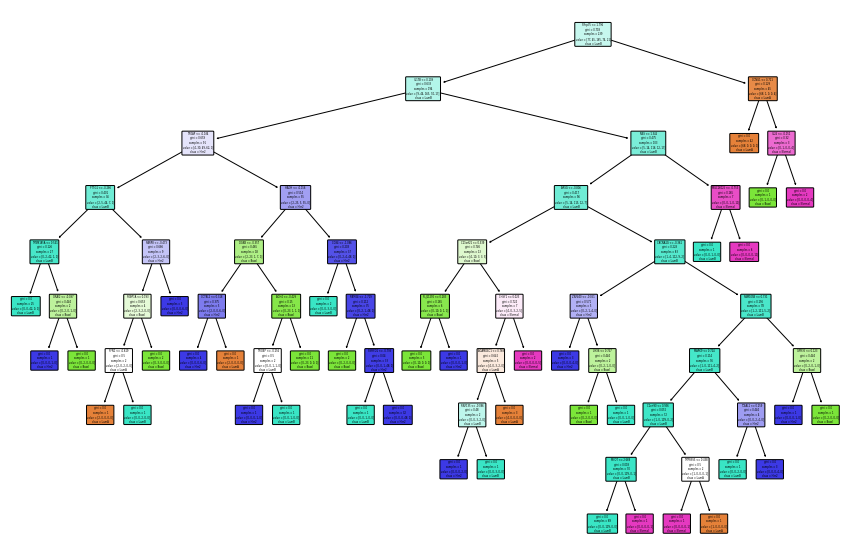

In [17]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=X.columns,
          class_names=df_combined['Subtype'].unique(), 
          filled=True, rounded=True)

plt.show()

### Genes Importance given by Random Regressor Classifier

In [18]:
model.feature_importances_

array([0.        , 0.00013915, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [19]:
X.columns

Index(['ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2', 'C10orf90', 'ZHX3',
       'ERCC5', 'GPR98', 'RXFP3',
       ...
       'CSF2', 'SLC2A11', 'GRIP2', 'GPLD1', 'RAB8A', 'PIK3IP1', 'SLC39A6',
       'SNRPD2', 'AQP7', 'CTSC'],
      dtype='object', length=17316)

In [20]:
# sorted descending by importance
df_importance = pd.DataFrame(zip(X.columns, list(model.feature_importances_)), columns=["Gene", "Importance"]).set_index("Gene").sort_values(by="Importance", ascending = False)
df_importance.head(20)

,Importance
Gene,
ESR1,0.009581
TBC1D9,0.008648
CA12,0.008245
SPC25,0.007533
NDC80,0.006821
AGR2,0.006530
KIF4A,0.005859
C6orf97,0.005301
MLPH,0.005216


In [21]:
df_subtype["Subtype"].value_counts()

LumA      232
LumB      129
Basal      98
Her2       58
Normal     30
Name: Subtype, dtype: int64